## Lab 1 - Best subset and forward selection

#### Import block

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from forward_select import forward_select
from get_mse import get_mse
from dfply import *
from operator import itemgetter

%matplotlib inline
plt.style.use('seaborn-white')

Load data

In [16]:
# Load data and drop all null value!
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
hitter = pd.read_csv(f'{data_path}Hitters.csv', index_col=0, na_values='NA').dropna()

# First look
hitter.head()

# Drop and transform categorical features
for i in ['League', 'Division', 'NewLeague']:
    hitter[i] = hitter[i].astype('category').cat.codes

hitter.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


### Lab 1: Subset Selection Models

### 6.5.1 Best Subset Selection

In [17]:
# Initialized variables
# y = hitter.Salary
# X = hitter.drop('Salary', axis=1)
# k = 19
# RSS_list, adj_R_squared_list, R_squared_list, \
# aic_list, bic_list, feature_list, num_features = [], [], [], [], [], [], []

# df = best_select(y, X, k)

After running this code once, SAVE it to the dataframe! It takes my i7-9700KS nearly 10 minutes to 
run so please save it and load it in for future analysis.
Top 8-features models are show below

In [18]:
# df.to_csv('best_subset2.csv')
df = pd.read_csv('best_subset2.csv', index_col=0)

In [45]:
df2 = df >> group_by(X.num_features) \
         >> mask(X.RSS == np.min(X.RSS), X.num_features < 9)

print(f'8 features are: {df2.features.iloc[7]}\n')
df2

8 features are: ['CRBI', 'Hits', 'PutOuts', 'Division', 'AtBat', 'Walks', 'CWalks', 'CRuns']



,num_features,features,R_squared,RSS,adj_R_squared,aic,bic
0,1,[CRBI],0.321450,3.645692e+07,0.318850,3862.139307,3869.283615
1,2,"[CRBI, Hits]",0.425224,3.100017e+07,0.420802,3820.487305,3831.203767
2,3,"[CRBI, Hits, PutOuts]",0.451429,2.970102e+07,0.445075,3810.214440,3824.503056
3,4,"[CRBI, Hits, PutOuts, Division]",0.475407,2.851292e+07,0.467273,3800.460294,3818.321064
4,5,"[CRBI, Hits, PutOuts, Division, AtBat]",0.490804,2.778375e+07,0.480897,3794.625624,3816.058548
5,6,"[CRBI, Hits, PutOuts, Division, AtBat, Walks]",0.508715,2.691117e+07,0.497200,3787.208000,3812.213078
6,7,"[CRBI, Hits, PutOuts, Division, AtBat, Walks, ...",0.513229,2.676847e+07,0.499866,3786.780304,3815.357536
7,8,"[CRBI, Hits, PutOuts, Division, AtBat, Walks, ...",0.528139,2.605070e+07,0.513277,3780.598605,3812.747991


Plots for features extraction.

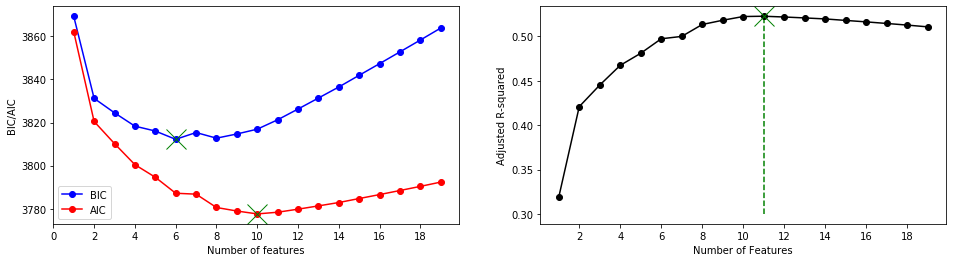

In [46]:
# Get the best models
df3 = df >> group_by(X.num_features) \
         >> filter_by(X.RSS == np.min(X.RSS))

# set up variables for plotting
bics = df3.bic
aics = df3.aic
adj_R_squared = df3.adj_R_squared
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
max_adjR_index, max_adjR = max(enumerate(adj_R_squared), key=itemgetter(1))

# Set up plots
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

# Left plot
ax1.plot(df3.num_features, bics, color='b', label='BIC', marker='o')
ax1.plot(df3.num_features, aics, color='r', label='AIC', marker='o')
ax1.plot(min_bic_index+1, min_bic, color='g', marker='x', markersize=20)
ax1.plot(min_aic_index+1, min_aic, color='g', marker='x', markersize=20)
ax1.set_ylabel('BIC/AIC')
ax1.set_xlabel('Number of features')
ax1.set_xticks(np.arange(0, 20, step=2))
ax1.legend()

# Right plot
ax2.plot(df3.num_features, adj_R_squared, color='k', marker='o')
ax2.plot(max_adjR_index+1, max_adjR, color='g', marker='x', markersize=20)
ax2.set_ylabel('Adjusted R-squared')
ax2.set_xlabel('Number of Features')
ax2.set_xticks(np.arange(0, 20, step=2))
ax2.vlines(max_adjR_index+1, ymin=0.3, ymax=max_adjR, linestyles='--', color='g')

We can observe the minimum BIC at 6 features and adjusted R squared maximum at 11 features
The model with the lowest BIC includes: AtBat, Hits, Walks, CRBI, Division, PutOuts

In [21]:
print('Model with the lowest BIC includes: \n')
df3.features.iloc[5]

Model with the lowest BIC includes: 



"('AtBat', 'Hits', 'Walks', 'CRBI', 'Division', 'PutOuts')"

### 6.5.2 - Forward and Backward stepwise selection

While the book shows how stepwise selection can be good, a quick read through 
online materials give me a second thought about implementing it. Read 
[here](https://stats.stackexchange.com/questions/20836/algorithms-for-automatic-model-selection/20856#20856)

Nevertheless, lets create the stepwise selection functions

In [22]:
# Initialized variables
y = hitter.Salary
X = hitter.drop('Salary', axis=1)
k = 19

# Run the function
df = forward_select(y, X, k)
df.head(2)

d:\pycharmprojects\islr\venv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,num_features,features,R_squared,RSS,adj_R_squared,aic,bic
0,1,[CRBI],0.321450,3.645692e+07,0.318850,3862.139307,3869.283615
1,2,"[CRBI, Hits]",0.425224,3.100017e+07,0.420802,3820.487305,3831.203767


The same results as given in the book. Nice! For a backward selection, we can modify 
the above loop slightly as in starting with all and remove one by one.

### 6.5.3 Choosing by cross validation

In this section, we will perform cross validate to get a much more realistic parameters.
If the full dataset is used as training, the test errors we get is inaccurate.

<b>Notes:</b> Using forward instead of best subset

#### Validation set approach
There are 4 steps:
1. Split data into train and test
2. Run forward selection on train
3. Predict and compare on test set
4. Get the best model and rerun using full data.

In [23]:
# Splitting data set
t_prop = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(),
                                                    test_size=t_prop, random_state=None)

# Run forward select
df = forward_select(y_train, X_train, k=19)

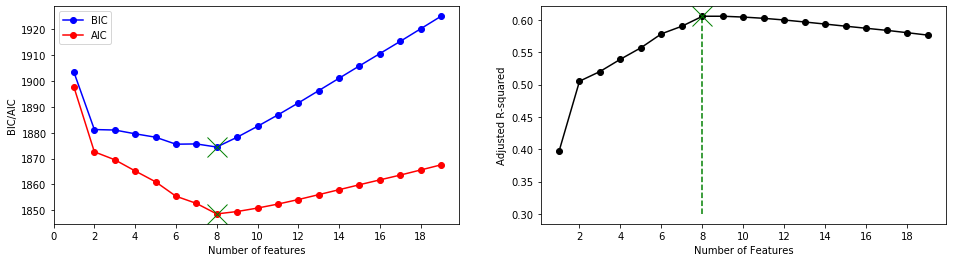

In [24]:
bics = df.bic
aics = df.aic
adj_R_squared = df.adj_R_squared
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
max_adjR_index, max_adjR = max(enumerate(adj_R_squared), key=itemgetter(1))

# Set up plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Left plot
ax1.plot(df.num_features, bics, color='b', label='BIC', marker='o')
ax1.plot(df.num_features, aics, color='r', label='AIC', marker='o')
ax1.plot(min_bic_index + 1, min_bic, color='g', marker='x', markersize=20)
ax1.plot(min_aic_index + 1, min_aic, color='g', marker='x', markersize=20)
ax1.set_ylabel('BIC/AIC')
ax1.set_xlabel('Number of features')
ax1.set_xticks(np.arange(0, 20, step=2))
ax1.legend()

# Right plot
ax2.plot(df.num_features, adj_R_squared, color='k', marker='o')
ax2.plot(max_adjR_index + 1, max_adjR, color='g', marker='x', markersize=20)
ax2.set_ylabel('Adjusted R-squared')
ax2.set_xlabel('Number of Features')
ax2.set_xticks(np.arange(0, 20, step=2))
ax2.vlines(max_adjR_index + 1, ymin=0.3, ymax=max_adjR, linestyles='--', color='g')

The best model contains about 8. At 9 predictors, the adjusted R squared increase slightly
but the AIC also decrease slightly. BIC suggest we only take 4 variables.

Lets see what validation set approach gives us. A simple loop

In [25]:
models = df.features
mse = get_mse(df, X_train, X_test, y_train, y_test)
    

In [26]:
idx, value = min(enumerate(mse), key=itemgetter(1))
print(f'The best model using validation set contains {idx+1} variables with mse of {value}')
print(models[7])

The best model using validation set contains 8 variables with mse of 131988.08377136476
['CRBI', 'Hits', 'CWalks', 'Walks', 'Division', 'CRuns', 'AtBat', 'PutOuts']


Finally, we perform a forward selection process and choose the best 8 variables model
using full data sets. Notice we get the same 8 variables but this can change depends
on the data splitting process.

In [27]:
X = hitter.drop('Salary', axis=1)
y = hitter.Salary

df = forward_select(y, X, k=19)
df.features[7]

['CRBI', 'Hits', 'PutOuts', 'Division', 'AtBat', 'Walks', 'CWalks', 'CRuns']

I will seperate the process of cross-validation on another notebook as this is getting
quite heavy.